# Data Mining Project
### Giorgio Donati, g.donati24@studenti.unipi.it
### Pietro Francaviglia, p.francaviglia1@studenti.unipi.it
#### A.Y. 2021-2022


# Libraries and datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler

from col_names import *
from utility import *
from kmeans_utility import *

In [2]:
with open(f'{PICKLE_FOLDER}clustering_df.pkl', 'rb') as f:
    clustering_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}pure_clustering_df.pkl', 'rb') as f:
    pure_clustering_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}user_selected_df.pkl', 'rb') as f:
    u_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}pure_user_selected_df.pkl', 'rb') as f:
    pure_u_df = pickle.load(f)

In [3]:
clustering_df_array = StandardScaler().fit_transform(clustering_df)
pure_clustering_df_array = StandardScaler().fit_transform(pure_clustering_df)

In [4]:
# Sum of Squared Errors: cohesion measure
# silhouette score: both cohesion and separation measure
clustering_scores_df = pd.DataFrame(columns = ['silhouette', 'SSE'], dtype=float)

## K-Means

### Elbow rule

In [5]:
elbow_rule(clustering_df_array)

KeyboardInterrupt: 

Best value for k: 9

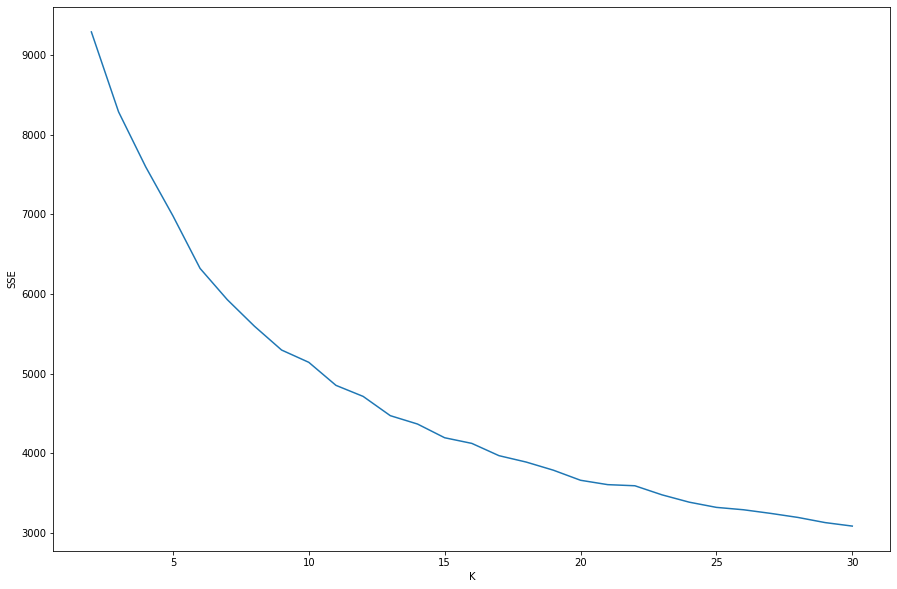

In [ ]:
elbow_rule(pure_clustering_df_array)

Best value for k: 9

### K-Means run

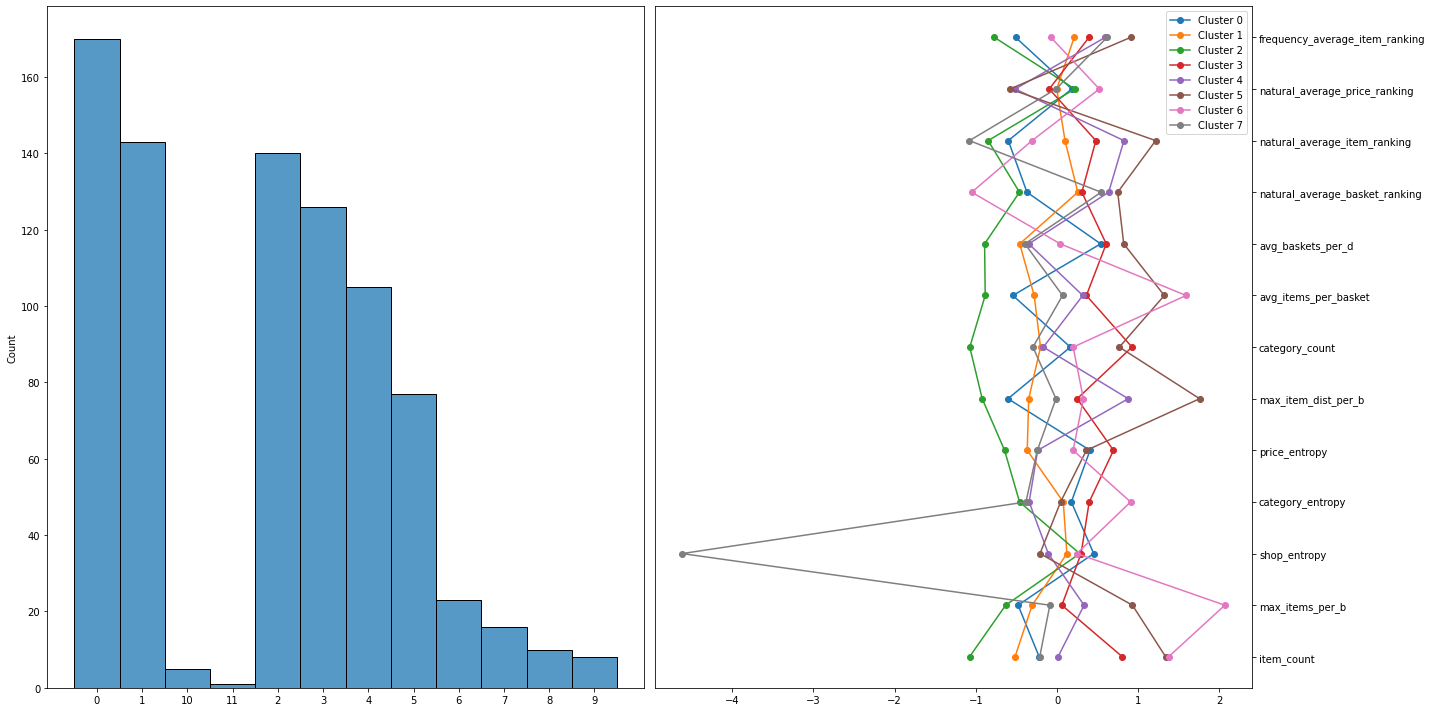

In [ ]:
kmeans_labels = kmeans_run(clustering_df_array, clustering_df, 12, 'kmeans', clustering_scores_df)

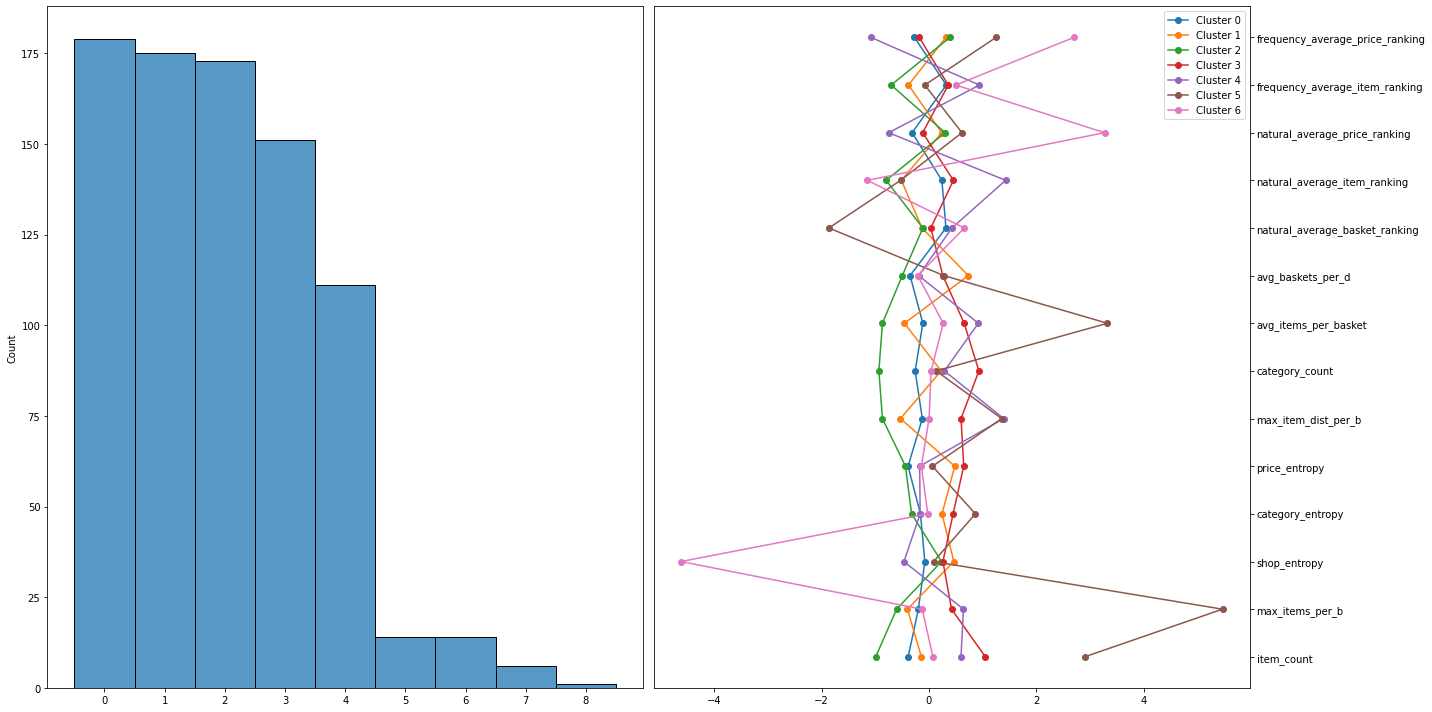

In [ ]:
pure_kmeans_labels = kmeans_run(pure_clustering_df_array, pure_clustering_df, 9, 'pure_kmeans', clustering_scores_df)

### Plots

In [ ]:
def scatter_cluster(max_cluster, feature_1, feature_2, labels, user_df, figsize=(14,12)):
    # mask to remove points in outliers clusters
    mask = (labels < max_cluster)
    mask.index = range(1, len(mask)+1)
    labels.index = range(1, len(labels)+1)

    plt.figure(figsize=figsize)
    scatter = plt.scatter(user_df[mask][feature_1], user_df[mask][feature_2], c=labels[mask])

    plt.legend(*scatter.legend_elements(), bbox_to_anchor=(1, 1))

/tmp/ipykernel_158756/3994178327.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  scatter = plt.scatter(user_df[mask][feature_1], user_df[mask][feature_2], c=labels[mask])


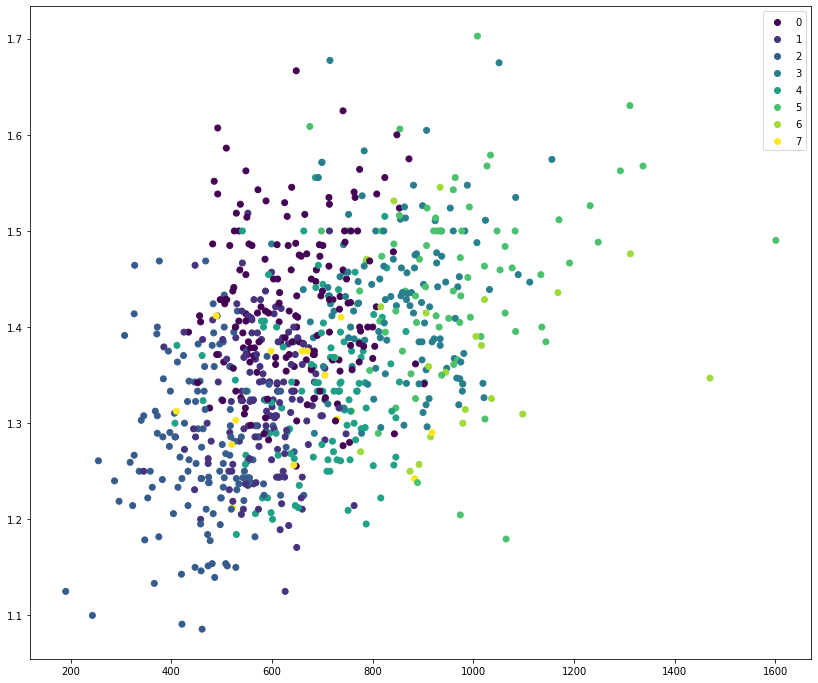

In [ ]:
scatter_cluster(8, ICNT, ABXVD, kmeans_labels, u_df)

/tmp/ipykernel_158756/3994178327.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  scatter = plt.scatter(user_df[mask][feature_1], user_df[mask][feature_2], c=labels[mask])


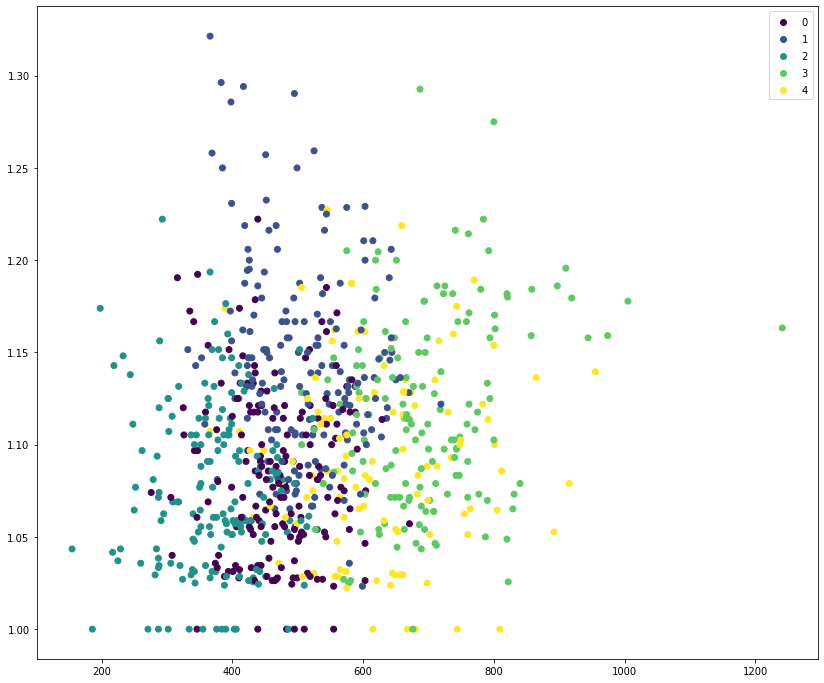

In [ ]:
scatter_cluster(5, ICNT, ABXVD, pure_kmeans_labels, pure_u_df)

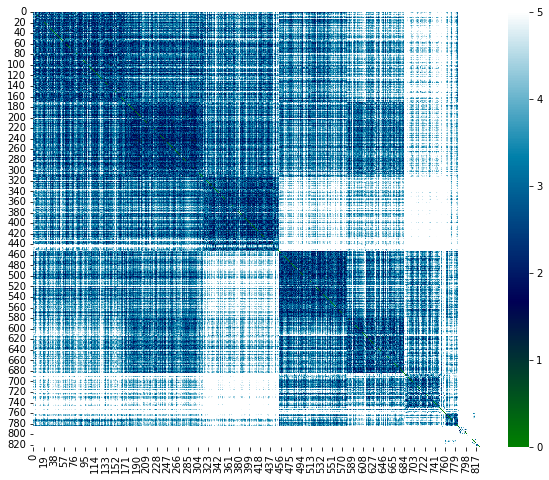

In [ ]:
distances = np.zeros((clustering_df_array.shape[0], clustering_df_array.shape[0]))
for i, x in enumerate(clustering_df_array):
    distances[i, :] = np.sqrt(np.sum((clustering_df_array - x) * (clustering_df_array - x), axis=1))
distances = distances[np.argsort(kmeans_labels), :]
distances = distances[:, np.argsort(kmeans_labels)]

fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.heatmap(np.clip(distances, 0, 5), ax=ax, cmap='ocean')
plt.show()

In [ ]:
u_df[LAB] = kmeans_labels
u_df.groupby(LAB).mean()

,user_id,item_count,item_dist_count,max_items_per_b,shop_entropy,category_entropy,item_entropy,price_entropy,max_item_dist_per_b,total_price,...,category_count,shop_count,avg_items_per_basket,avg_baskets_per_d,natural_average_basket_ranking,natural_average_item_ranking,natural_average_price_ranking,frequency_average_basket_ranking,frequency_average_item_ranking,frequency_average_price_ranking
label,,,,,,,,,,,,,,,,,,,,,
0,434.194118,643.347059,498.970588,69.047059,2.968678,2.610431,6.170171,3.999127,53.723529,5.724652e+05,...,46.323529,29.500000,11.637517,1.420271,4.243757,1.609458,2.609874,4.153190,4.083160,2.884926
1,402.587413,581.265734,450.811189,84.258741,2.775252,2.599369,6.075635,3.830858,63.055944,5.174090e+05,...,44.671329,26.622378,12.482571,1.320359,4.547818,2.043444,2.564382,4.553260,4.470098,2.741931
2,408.135714,464.700000,368.092857,55.550000,2.867837,2.539373,5.865912,3.770174,42.121429,4.082560e+05,...,40.750000,26.214286,10.540244,1.277002,4.198795,1.455386,2.619006,4.048100,3.943052,2.901584
3,413.396825,856.777778,636.166667,116.492063,2.877616,2.634907,6.413663,4.062155,84.857143,7.718702e+05,...,49.738095,30.507937,14.556078,1.427149,4.572179,2.279305,2.541643,4.591265,4.568017,2.710081
4,387.590476,691.619048,529.704762,140.561905,2.640826,2.552579,6.234803,3.858793,107.828571,5.730311e+05,...,44.828571,27.066667,14.411542,1.331587,4.732447,2.494026,2.438126,4.746103,4.675569,2.460237
5,429.103896,967.753247,709.623377,193.000000,2.581002,2.595705,6.518178,3.989498,139.961039,8.175313e+05,...,49.038961,28.142857,17.647779,1.448778,4.786728,2.736765,2.422759,4.874422,4.843242,2.356934
6,398.173913,975.000000,568.086957,293.173913,2.846623,2.691686,6.299910,3.953919,87.652174,9.481741e+05,...,46.478261,29.260870,18.510111,1.370418,3.913412,1.791080,2.693816,3.892142,4.316151,3.118459
7,414.500000,644.750000,486.750000,103.437500,0.000000,2.548166,6.145333,3.857859,75.312500,5.355792e+05,...,44.250000,1.000000,13.610634,1.326831,4.687500,1.312500,2.562500,4.812500,4.687500,3.125000
8,353.400000,749.600000,571.100000,105.700000,0.000000,2.584618,6.299638,3.963319,80.900000,6.520201e+05,...,47.200000,1.000000,14.076515,1.383248,1.800000,0.400000,3.600000,1.400000,2.100000,4.600000


In [ ]:
pure_u_df[LAB] = kmeans_labels
pure_u_df.groupby(LAB).mean()

,user_id,item_count,item_dist_count,max_items_per_b,shop_entropy,category_entropy,item_entropy,price_entropy,max_item_dist_per_b,total_price,...,category_count,shop_count,avg_items_per_basket,avg_baskets_per_d,natural_average_basket_ranking,natural_average_item_ranking,natural_average_price_ranking,frequency_average_basket_ranking,frequency_average_item_ranking,frequency_average_price_ranking
label,,,,,,,,,,,,,,,,,,,,,
0,434.194118,494.705882,380.335294,56.888235,2.967532,2.975693,5.894781,3.746916,44.400000,4.437016e+05,...,45.647059,28.900000,11.594066,1.129321,5.110215,1.624040,2.606265,4.052906,4.102687,2.876476
1,402.587413,450.370629,347.006993,70.188811,2.780014,2.956947,5.810124,3.609500,52.426573,4.006034e+05,...,44.055944,26.062937,12.106068,1.083876,5.318179,2.057700,2.561384,4.368181,4.495431,2.697731
2,408.135714,359.664286,282.421429,46.492857,2.862365,2.906478,5.596657,3.571291,34.900000,3.137429e+05,...,40.135714,25.571429,9.957285,1.079386,5.112193,1.476223,2.619199,3.990475,3.966156,2.913398
3,413.396825,661.960317,484.968254,96.968254,2.881892,3.008121,6.137659,3.802505,70.134921,5.942386e+05,...,49.119048,29.833333,14.664493,1.122562,5.246813,2.292881,2.541779,4.333090,4.581195,2.607953
4,387.590476,531.038095,402.819048,116.047619,2.642780,2.913488,5.957774,3.623315,88.295238,4.399490e+05,...,44.057143,26.266667,14.069846,1.087139,5.369832,2.504585,2.437535,4.461393,4.694900,2.371775
5,429.103896,737.389610,535.454545,156.324675,2.587429,2.968762,6.231854,3.702831,114.389610,6.203851e+05,...,48.480519,27.467532,18.010294,1.113780,5.333489,2.747591,2.423275,4.487944,4.867667,2.208416
6,398.173913,759.652174,434.739130,250.260870,2.843705,3.076690,6.028616,3.718771,74.086957,7.428966e+05,...,46.000000,28.782609,18.338863,1.110884,4.608112,1.803008,2.624049,3.744400,4.262944,3.093205
7,414.500000,495.562500,373.312500,81.125000,0.000000,2.917777,5.874132,3.630550,61.500000,4.243611e+05,...,43.937500,1.000000,13.090680,1.093681,5.750000,1.312500,2.562500,5.187500,4.750000,3.000000
8,353.400000,579.100000,436.300000,88.000000,0.000000,2.948541,6.025364,3.697935,66.000000,5.052058e+05,...,46.500000,1.000000,14.221943,1.098238,2.600000,0.400000,3.400000,1.400000,2.000000,4.700000


In [ ]:
clustering_scores

,silhouette,SSE
kmeans,0.123643,5336.065431
